<a href="https://colab.research.google.com/github/xBrymer/TensorFlow-Basics/blob/master/Cost_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install seaborn
!pip install -q git+https://github.com/tensorflow/docs

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop

import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
raw_ds_path = tf.keras.utils.get_file("insurance.csv", "https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv")
raw_ds = pd.read_csv(raw_ds_path)
raw_ds.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [ ]:
sex_ds = pd.get_dummies(raw_ds.sex)
smoker_ds = pd.get_dummies(raw_ds.smoker)

print(sex_ds)
print(smoker_ds)

In [5]:
normalized_ds = pd.concat([raw_ds,sex_ds,smoker_ds], axis = 1)

In [6]:
normalized_ds = normalized_ds.drop('region',axis =1)

In [7]:

normalized_ds = normalized_ds.drop('smoker', axis =1)
normalized_ds = normalized_ds.drop('sex', axis =1)

In [8]:
normalized_ds

,age,bmi,children,expenses,female,male,no,yes
0,19,27.9,0,16884.92,1,0,0,1
1,18,33.8,1,1725.55,0,1,1,0
2,28,33.0,3,4449.46,0,1,1,0
3,33,22.7,0,21984.47,0,1,1,0
4,32,28.9,0,3866.86,0,1,1,0
...,...,...,...,...,...,...,...,...
1333,50,31.0,3,10600.55,0,1,1,0
1334,18,31.9,0,2205.98,1,0,1,0
1335,18,36.9,0,1629.83,1,0,1,0
1336,21,25.8,0,2007.95,1,0,1,0


In [9]:
train_dataset = normalized_ds.sample(frac=0.8,random_state=0)
test_dataset = normalized_ds.drop(train_dataset.index)

In [10]:
train_labels = train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')

In [11]:
def build_model():
  model = Sequential([
    Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    Dropout(0.20),
    Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    Dropout(0.20),
    tf.keras.layers.Flatten(),
    Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model


In [12]:
model = build_model()

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                512       
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
______________________________________________________

In [ ]:
history = model.fit(train_dataset, train_labels, validation_split = 0.2, epochs = 1000, verbose =1)

9/9 - 0s - loss: 32948472.0000 - mae: 3118.2612 - mse: 32948472.0000
Testing set Mean Abs Error: 3118.26 expenses
You passed the challenge. Great job!


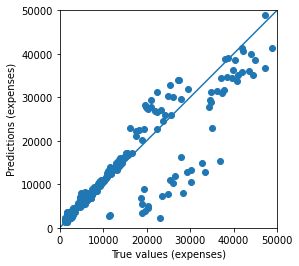

In [18]:
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)

In [19]:
cd '/content/drive/My Drive/External Datasets/Models'

/content/drive/My Drive/External Datasets/Models


In [21]:
model.save('Health_Cost_Prediction.h5')